# The problem: Balance production to profit

## An oil company manufactures different types of gasoline and diesel. Each type of gasoline is produced by blending different types of crude oils that must be purchased. The company must decide how much crude oil to buy to maximize its profits. It must also respect processing capacities and quality levels. And, finally, it must satisfy customer demand.


###### Data
The oil-blending problem consists of calculating different blends of gasoline according to specific quality criteria.
There are three types of gasoline manufactured:
- super
- regular
- diesel

The company produces each type of gasoline by blending three types of crude oil:

* crude1
* crude2
* crude3

The potential blendings are constrained because the gasoline must satisfy some quality criteria with respect to their lead content and their octane ratings.
The company must satisfy its customer demand, which is:
3,000 barrels a day of super
2,000 barrels a day of regular
1,000 barrels a day of diesel
The company can purchase 5,000 barrels of each type of crude oil per day, and can process at most 14,000 barrels a day.
The company has the option of advertising a gasoline, which increases the demand for this type of gasoline by ten barrels for every dollar spent.
It costs four dollars to transform a barrel of oil into a barrel of gasoline.
The goal is to maximize profit, which comes from the sales of the final products minus total costs. The costs consist of the purchase cost of the crude oils, production costs, and inventory costs.

###### For each gasoline type has following attributes:
* capacity
* price
* octane
* lead level

###### You set up the same kind of array where each oil type contains the following attributes:
* demand
* price
* octane
* lead level


In [1]:
!pip install numpy -q
import numpy as np

gas_names = ["super", "regular", "diesel"]

gas_data = np.array([[3000, 70, 10, 1], [2000, 60, 8, 2], [1000, 50, 6, 1]])

oil_names = ["crude1", "crude2", "crude3"]

oil_data = np.array([[5000, 45, 12, 0.5], [5000, 35, 6, 2], [5000, 25, 8, 3]])

nb_gas  = len(gas_names)
nb_oils = len(oil_names)
range_gas = range(nb_gas)
range_oil = range(nb_oils)
print("Number of gasoline types = {0}".format(nb_gas))
print("Number of crude types = {0}".format(nb_oils))

# global data
production_cost = 4
production_max = 14000
# each $1 spent on advertising increases demand by 10.
advert_return = 10

Number of gasoline types = 3
Number of crude types = 3


In [2]:
!pip install pandas -q

In [3]:
import pandas as pd
gaspd = pd.DataFrame([(gas_names[i],int(gas_data[i][0]),int(gas_data[i][1]),int(gas_data[i][2]),int(gas_data[i][3])) 
                      for i in range_gas])
oilpd = pd.DataFrame([(oil_names[i],int(oil_data[i][0]),int(oil_data[i][1]),int(oil_data[i][2]),oil_data[i][3]) 
                      for i in range_oil])
gaspd.columns = ['name','demand','price','octane','lead']
oilpd.columns= ['name','capacity','price','octane','lead']


In [4]:
CSS = """
body {
    margin: 0;
    font-family: Helvetica;
}
table.dataframe {
    border-collapse: collapse;
    border: none;
}
table.dataframe tr {
    border: none;
}
table.dataframe td, table.dataframe th {
    margin: 0;
    border: 1px solid white;
    padding-left: 0.25em;us
    padding-right: 0.25em;
}
table.dataframe th:not(:empty) {
    background-color: #fec;
    text-align: left;
    font-weight: normal;
}
table.dataframe tr:nth-child(2) th:empty {
    border-left: none;
    border-right: 1px dashed #888;
}
table.dataframe td {
    border: 2px solid #ccf;
    background-color: #f4f4ff;
}
    table.dataframe thead th:first-child {
        display: none;
    }
    table.dataframe tbody th {
        display: none;
    }
"""

from IPython.core.display import HTML
HTML('<style>{}</style>'.format(CSS))

In [69]:
from IPython.display import display
print("Gas data:")
display(gaspd)
print("Oil data:")
display(oilpd)

Gas data:


,name,demand,price,octane,lead
0,super,3000,70,10,1
1,regular,2000,60,8,2
2,diesel,1000,50,6,1


Oil data:


,name,capacity,price,octane,lead
0,crude1,5000,45,12,0.5
1,crude2,5000,35,6,2.0
2,crude3,5000,25,8,3.0


### Decision Optimization part
### Setup DOcplex 



<img src='https://github.com/sumeetparashar/IBM-Decision-Optimization-Introductory-notebook/blob/master/Screen%20Shot%202017-09-03%20at%203.34.30%20PM.png?raw=true' width="50%" height="50%"></img>

#### code to set DOcplex

    !pip install --user docplex -q
    from docplex.mp.context import *

    url= "https://api-oaas.docloud.ibmcloud.com/job_manager/rest/v1/"
    key = "xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx"

    ctx = Context.make_default_context(url=url, key=key)

In [5]:
## insert code here to set DOcplex



### Create DOcplex model

    ## code to set DOcplex model

    from docplex.mp.model import Model

    mdl = Model(name="oil_blending",context=ctx)

In [6]:
## Insert code here to set DOcplex model



### Create the decision variables

For each combination of oil and gasoline, you must decide the quantity of oil to use to produce a gasoline. You use a decision variable to represent that amount.

You must also decide how much money should be spent in advertising for each type of gasoline. Create a list of continuous variables, indexed by the gasolines:

    ## code to define Decision Variables

    blends = mdl.continuous_var_matrix(keys1=nb_oils, keys2=nb_gas, lb=0)
    adverts = mdl.continuous_var_list(nb_gas, lb=0)

In [7]:
## Insert code to define decision variables



###### Add constraints

* The **demand** for each gasoline type must be satisfied. The total demand includes the initial demand as stored in the data, plus a variable demand caused by the advertising. The increase in demand is assumed to be proportional to the advertising cost.





    ## code to add Demand constraint

    for g in range(nb_gas):
    # gasoline demand is numpy array field #0
        gas_demand = gas_data[g][0]
        mdl.add_constraint(mdl.sum(blends[o, g] for o in range(nb_oils)) == gas_demand + advert_return * adverts[g])
    

In [8]:
## Insert code to add Demand Constraint



* **Capacity constraint**: For each gasoline type, the total quantity produced must equal the raw demand plus 
  the demand increase created by the advertising.
 

    ## code to add Capacity Constraint

    for o in range_oil:
        mdl.add_constraint(mdl.sum(blends[o,g] for g in range_gas) <= oil_data[o][0])


In [9]:
## Insert code to add Capacity Constraint 



* For each gasoline type, the **octane level** must be above a minimum level, and the **lead level** must be below a maximum level.

    ## code to add constraints for Octane level and Lead level

    # minimum octane level
    for g in range_gas:
        gas_octane = gas_data[g][2]
        mdl.add_constraint(mdl.sum(blends[o,g]*(oil_data[o][2] - gas_octane) for o in range_oil) >= 0)
    
    # maximum lead  level
    for g in range_gas:
        gas_lead = gas_data[g][3]
        mdl.add_constraint(mdl.sum(blends[o,g]*(oil_data[o][3] - gas_lead) for o in range_oil) <= 0)


In [10]:
## Insert code to add constraints for Octane level and Lead level



* The **total production** must not exceed the maximum (which is defined as 14000 barrels per day):

    ## code to add Total Production constraint and print model information

    # -- maximum global production
    mdl.add_constraint(mdl.sum(blends) <= production_max)

    mdl.print_information()


In [11]:
## Insert code to add Total Production constraint and print model information



### Define key performance indicators (KPI)

The objective or goal of the model is to maximize profit.
* Profit is made from the sales of the final products minus total costs. 
* The costs consist of the purchase cost of the crude oils, production costs, and inventory costs.

The model maximizes the net revenue.
* Net revenue is revenue minus oil cost and production cost.  
* Then, subtract the total advertising cost.

Therefore, to define the business objective, define a few key performance indicators (KPIs):

- Total advertising cost

- Total oil cost

- Total production cost

- Total revenue



    ## code to add KPI's and Objective

    # KPIs
    total_advert_cost = mdl.sum(adverts)
    mdl.add_kpi(total_advert_cost, "Total advertising cost")
    total_oil_cost = mdl.sum(blends[o,g] * oil_data[o][1] for o in range_oil for g in range_gas)
    mdl.add_kpi(total_oil_cost, "Total Oil cost")
    total_production_cost = production_cost * mdl.sum(blends)
    mdl.add_kpi(total_production_cost, "Total production cost")
    total_revenue = mdl.sum(blends[o,g] * gas_data[g][1] for g in range(nb_gas) for o in range(nb_oils))
    mdl.add_kpi(total_revenue, "Total revenue")

    # finally the objective
    mdl.maximize(total_revenue - total_oil_cost - total_production_cost - total_advert_cost)

In [12]:
## Insert code to add KPI's and Objective



### Call the CPLEX solve service

    ## code to Solve and Report results

    mdl.solve()
    mdl.report()

In [13]:
## Insert code to Solve and Report results



## display Decision Variables

    ## code to print decision variable values
    mdl.print_solution()

In [14]:
## Insert code to print decision variable values



    ## code to display Blends Decision Variable table
    BlendsPD = pd.DataFrame([oil_names[o],blends[o,0].solution_value,blends[o,1].solution_value,blends[o,2].solution_value] for o in range_oil )

    BlendsPD.columns= ['name','Super','Regular','Diesel']
    print BlendsPD
    display(BlendsPD)

In [15]:
## Insert code to display Blends Decision Variable table



#### Analyze and display the solution¶
First, get the KPI values and store them in a Pandas DataFrame:

In [14]:
all_kpis = [(kp.name, kp.compute()) for kp in mdl.iter_kpis()]
kpis_bd = pd.DataFrame(all_kpis, columns=['kpi', 'value'])

In [15]:
blend_values = [ [ blends[o,g].solution_value for g in range_gas] for o in range_oil]
total_gas_prods = [sum(blend_values[o][g] for o in range_oil) for g in range_gas]

prods = zip(gas_names, total_gas_prods)
prods_bd = pd.DataFrame(prods)

Then, display some KPIs in pie charts by using the matplotlib Python package.

KPIs: Revenue - Oil Cost - Production Cost


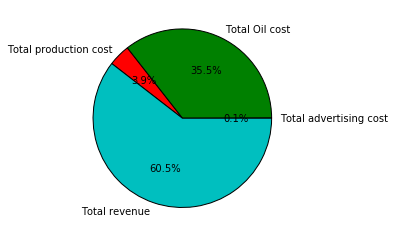

In [16]:
!pip install matplotlib -q

%matplotlib inline
import matplotlib.pyplot as plt
def display_pie(pie_values, pie_labels, colors=None):
    plt.axis("equal")
    plt.pie(pie_values, labels=pie_labels, colors=colors, autopct="%1.1f%%")
    plt.show()
    
print("KPIs: Revenue - Oil Cost - Production Cost")
                                                       
display_pie( [kpnv[1] for kpnv in all_kpis], [kpnv[0] for kpnv in all_kpis])

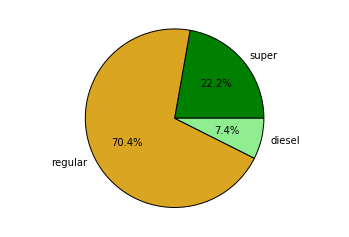

In [17]:
display_pie(total_gas_prods, gas_names, colors=["green", "goldenrod", "lightGreen"])
